# K Nearest Neighbors

In [1]:
import numpy as np

In [2]:
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import warnings

/Users/vidur/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt', header=None, names=['id', 'clump_thick', 'uni_cell_size', 'uni_cell_shape', 'marg_adhesion', 'single_epi_cell_size', 'Bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class'])

In [4]:
df.head()

,id,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_epi_cell_size,Bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# # 2 - benign, 4 - malignant

In [5]:
df.replace('?', -99999, inplace=True)

In [6]:
df.drop(['id'], 1, inplace=True)

In [7]:
df.head()

,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_epi_cell_size,Bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Distinguish Labels and Classes

In [8]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [9]:
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ..., 
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [10]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [11]:
X[3]

array([6, 8, 8, 1, 3, 4, 3, 7, 1])

In [12]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
accuracy = clf.score(X_test, y_test)

In [14]:
print(accuracy)

0.971428571429


In [15]:
example_test = np.array([6,10,10,10,4,10,7,10,1])
example_test

array([ 6, 10, 10, 10,  4, 10,  7, 10,  1])

In [16]:
example_test = example_test.reshape(1,-1)
example_test.shape

(1, 9)

In [17]:
prediction = clf.predict(example_test)
prediction

array([4])

In [18]:
probability = clf.predict_proba(example_test)
probability

array([[ 0.,  1.]])

# # Implementation from Scratch

In [55]:
data = {'k': [[1,2],[3,4],[1,3], [2,2], [3,5], [1,1], [2,0]], 'r': [[6,5], [7,7], [8,6], [5,6], [4,7], [5,5], [10,9]]}

In [60]:
test_feature = [4,6]

In [57]:
ls = ['r', 'k', 'r', 'r', 'k', 'r', 'k', 'r', 'k', 'k', 'r' , 'k', 'r']
c = Counter(ls)
c.most_common(1)[0][0]

'r'

In [58]:
for i in data:
    for ii in data[i]:
        plt.scatter(ii[0], ii[1], s = 10, c=i)

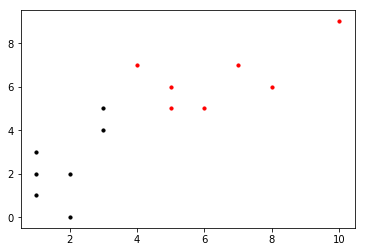

In [59]:
plt.show()

In [61]:
def calc_nearest_neighbors(data, data_predict, k=3):
    if(len(data) > k):
        print('WTF!!')
    else:
        
        ##algo
        distances = [] 
    
        for group in data:
            for feature in data[group]:
                ##use numpy linearalgebra to calc distance 
                distance = np.linalg.norm(np.array(feature) - np.array(data_predict))
                distances.append([distance, group])
        
        required_distances = sorted(distances)[:k]
        nearest_class = []
        
        for least_distant_points in required_distances:
            nearest_class.append(least_distant_points[1])
            
        print(nearest_class)
        c = Counter(nearest_class)
        result = c.most_common(1)[0][0]
        return result      

In [62]:
calc_nearest_neighbors(data, test_feature, 3)

['r', 'r', 'k']


'r'